# Demo notebook exploring reading and manipulating ESA nc5 soil moisture data

## Jacquelyn Witte

In [1]:
import os
import earthpy as et
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
data_dir = os.path.join(et.io.HOME,
                        'earth-analytics',
                        'data', 'capstone', 'soil-moisture')

file = os.path.join(data_dir, 'C3S-SOILMOISTURE-L3S-SSMS-ACTIVE-DAILY-20130915000000-TCDR-v202012.0.0.nc')

data = xr.open_dataset(file).squeeze()
data

<xarray.Dataset>
Dimensions:         (lat: 720, lon: 1440)
Coordinates:
  * lon             (lon) float64 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * lat             (lat) float64 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
    time            datetime64[ns] 2013-09-15
Data variables:
    sm              (lat, lon) float32 ...
    sm_uncertainty  (lat, lon) float32 ...
    flag            (lat, lon) float32 ...
    freqbandID      (lat, lon) float32 ...
    dnflag          (lat, lon) float32 ...
    mode            (lat, lon) float32 ...
    sensor          (lat, lon) float32 ...
    t0              (lat, lon) datetime64[ns] ...
Attributes: (12/40)
    title:                      C3S Surface Soil Moisture merged ACTIVE Product
    institution:                EODC (AUT); TU Wien (AUT); VanderSat B.V. (NL)
    contact:                    C3S_SM_Science@eodc.eu
    source:                     WARP 5.5R1.1/AMI-WS/ERS12 Level 2 Soil Moistu...
    platform:                   ERS-1, ERS-2, METOP-A, METOP-B
    sensor:                     AMI-WS, ASCAT-A, ASCAT-B
    ...                         ...
    geospatial_vertical_max:    0.0
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east
    geospatial_lat_resolution:  0.25 degree
    geospatial_lon_resolution:  0.25 degree
    spatial_resolution:         25km

In [3]:
# Subset the data
res = data.where((data['lon'] > -110) & (
    data['lon'] < -101.5) & (
    data['lat'] < 41.5) & (
    data['lat'] > 36.5) & (
    data['sm'] < 101) & (
    data['sm'] > 0), drop=True)
res

<xarray.Dataset>
Dimensions:         (lat: 20, lon: 34)
Coordinates:
  * lon             (lon) float64 -109.9 -109.6 -109.4 ... -102.1 -101.9 -101.6
  * lat             (lat) float64 41.38 41.12 40.88 40.62 ... 37.12 36.88 36.62
    time            datetime64[ns] 2013-09-15
Data variables:
    sm              (lat, lon) float32 88.08 80.75 77.72 ... 78.25 79.44 78.14
    sm_uncertainty  (lat, lon) float32 11.46 10.83 10.01 ... 10.02 9.141 9.501
    flag            (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    freqbandID      (lat, lon) float32 2.0 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0
    dnflag          (lat, lon) float32 2.0 2.0 2.0 2.0 2.0 ... 1.0 1.0 1.0 1.0
    mode            (lat, lon) float32 1.0 1.0 1.0 1.0 1.0 ... 2.0 2.0 2.0 2.0
    sensor          (lat, lon) float32 256.0 256.0 256.0 ... 256.0 256.0 256.0
    t0              (lat, lon) datetime64[ns] 2013-09-15T04:40:00 ... 2013-09...
Attributes: (12/40)
    title:                      C3S Surface Soil Moisture merged ACTIVE Product
    institution:                EODC (AUT); TU Wien (AUT); VanderSat B.V. (NL)
    contact:                    C3S_SM_Science@eodc.eu
    source:                     WARP 5.5R1.1/AMI-WS/ERS12 Level 2 Soil Moistu...
    platform:                   ERS-1, ERS-2, METOP-A, METOP-B
    sensor:                     AMI-WS, ASCAT-A, ASCAT-B
    ...                         ...
    geospatial_vertical_max:    0.0
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east
    geospatial_lat_resolution:  0.25 degree
    geospatial_lon_resolution:  0.25 degree
    spatial_resolution:         25km

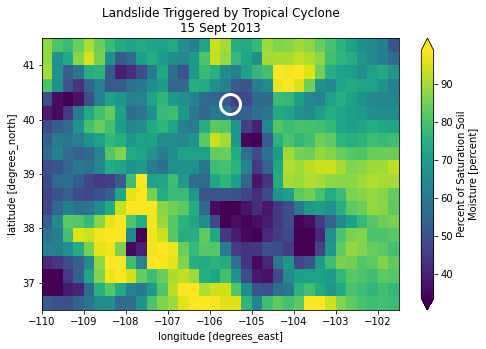

In [4]:
# plot the data
f, ax = plt.subplots(figsize=(8, 5))
res['sm'].plot(x='lon', y='lat', ax=ax, robust=True)

ax.plot([-105.529], [40.29350], 'o', color='white',
        markersize=20, fillstyle='none', markeredgewidth=3)

ax.set(title = 'Landslide Triggered by Tropical Cyclone\n15 Sept 2013')

# Saving figure
plot_output = os.path.join(et.io.HOME,
                           'earth-analytics',
                           'ea-python-2022-capstone', 'plots',
                           'cs3_sm_tropical_cyclone_20130915.jpg')

plt.savefig(plot_output)